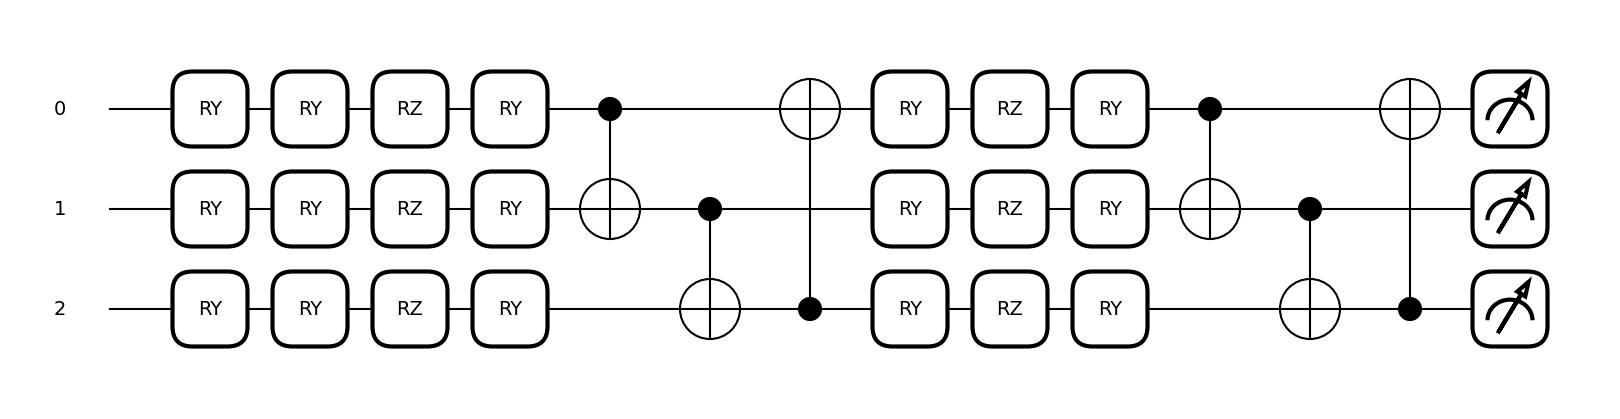

In [3]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt


n_qubits = 3
L = 2  # number of variational layers

dev = qml.device("default.qubit", wires=n_qubits)

def variational_layer(params):
    """
    params has shape (n_qubits, 3):
    params[j] = (theta_{ell,j,0}, theta_{ell,j,1}, theta_{ell,j,2})
    """
    # Local trainable rotations
    for j in range(n_qubits):
        qml.RY(params[j, 0], wires=j)
        qml.RZ(params[j, 1], wires=j)
        qml.RY(params[j, 2], wires=j)

    # Entangling ring: CNOT(j, (j+1) mod n_qubits)
    for j in range(n_qubits):
        qml.CNOT(wires=[j, (j + 1) % n_qubits])

@qml.qnode(dev)
def circuit(z, thetas):
    """
    z: shape (3,)      -- angle-encoding inputs z_j
    thetas: shape (L, 3, 3) -- variational parameters
    """
    # Angle encoding: U_encode(z) = ⊗_j RY(z_j)
    for j in range(n_qubits):
        qml.RY(z[j], wires=j)

    # Apply L variational layers
    for ell in range(L):
        variational_layer(thetas[ell])

    return qml.state()
z_example = np.array([0.1, 0.2, 0.3])
thetas_example = np.zeros((L, n_qubits, 3))

# Matplotlib circuit diagram
fig = qml.draw_mpl(circuit)(z_example, thetas_example)
plt.show()
